In [1]:

#Lets import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report


## Loading the dataset

In [2]:
#Loading the Dtasets
data=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Feature Engineering

In [3]:

columns_to_drop = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income'] 

df = data.drop(columns=columns_to_drop)


In [4]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [5]:
# Move the "HeartDiseaseorAttack" column to the last position
cols = list(df.columns)
cols.remove("HeartDiseaseorAttack")
cols.append("HeartDiseaseorAttack")
data = df[cols]

In [6]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,HeartDiseaseorAttack
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,0.0


In [7]:
# Replace "column_name" with the name of the column you want to analyze
unique_values_count = data["HeartDiseaseorAttack"].value_counts()

print(unique_values_count)

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


## Description about the dataset

### BMI: Body Mass Index, calculated by dividing the person's weight (in kilograms) by the square of their height (in meters).
### Smoker: Indicates if the person has smoked at least 100 cigarettes.
### Stroke: Indicates if the person has a history of stroke.
### Diabetes: Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.
### PhysActivity: Indicates if the person has some form of physical activity in their day-to-day routine.
### Fruits: Indicates if the person consumes 1 or more fruit(s) daily.
### HvyAlcoholConsump: Indicates if the person has more than 14 drinks per week.
### Sex: Indicates the gender of the person, where 0 is female and 1 is male.
### Age: Indicates the age class of the person, where 1 is 18 years to 24 years up till 13 which is 80 years or older, each interval between has a 5-year increment.
### HeartDiseaseorAttack : Indicates that the person with 0 is no heart disease or attack and 1 is the person is having the heart disease or attack
### HighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.
### HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.
### CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.
### Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.
### GenHlth : Indicates the persons response to how well is their general health, ranging from 1 (excellent) to 5 (poor).
### Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.
### PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.
### DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.




## Data Preprocessing

In [8]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
HeartDiseaseorAttack    0
dtype: int64

In [9]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   Diabetes              253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

In [10]:
# statistical measures about the data
data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,HeartDiseaseorAttack
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,0.094186
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.292087
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,1.000000


In [11]:
data.shape

(253680, 18)

In [12]:

X = data.drop(columns='HeartDiseaseorAttack', axis=1)


In [13]:
y = data['HeartDiseaseorAttack']

In [14]:
X.shape

(253680, 17)

In [15]:
y.shape

(253680,)

## Data Analysis

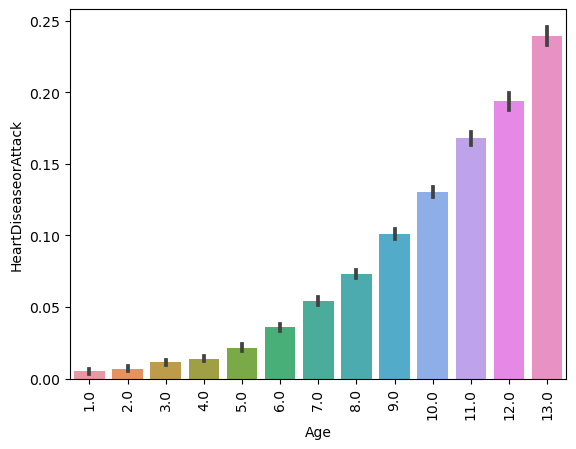

In [16]:

sns.barplot(x=data['Age'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

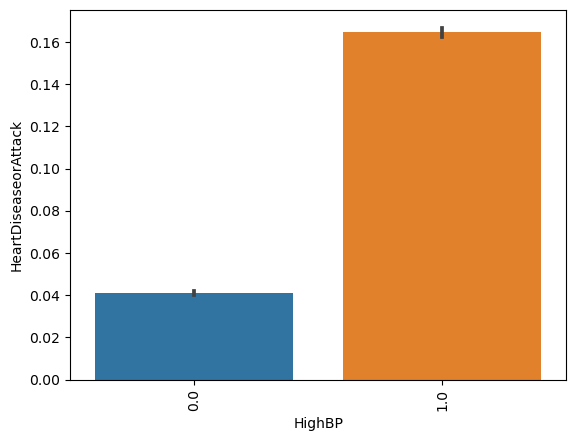

In [17]:

sns.barplot(x=data['HighBP'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

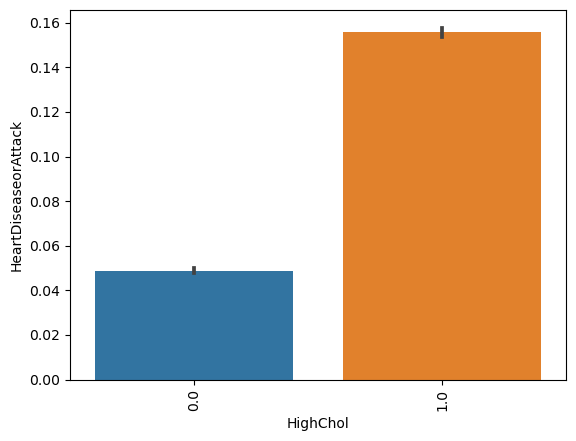

In [18]:
sns.barplot(x=data['HighChol'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

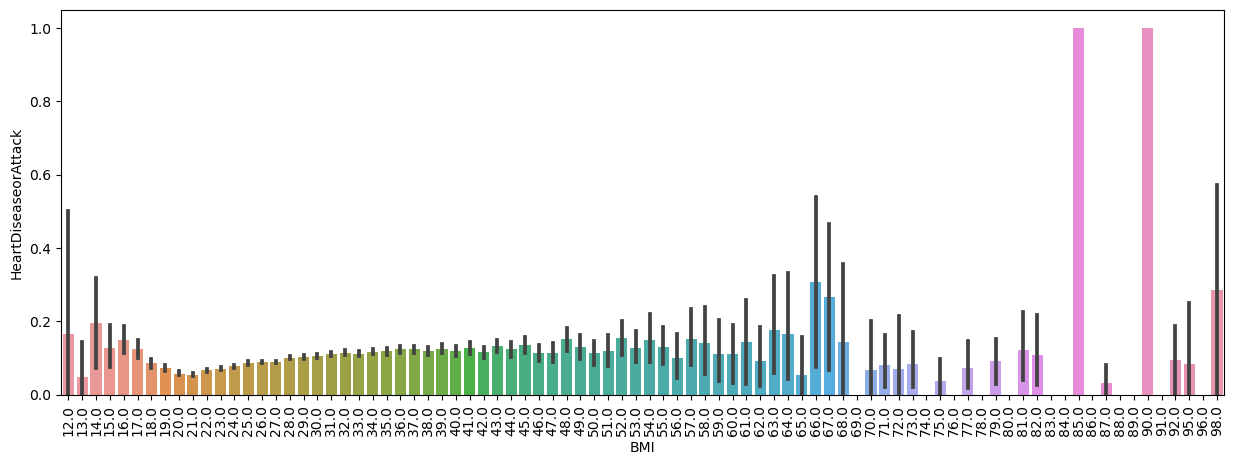

In [19]:

plt.figure(figsize=(15,5))
sns.barplot(x=data['BMI'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()


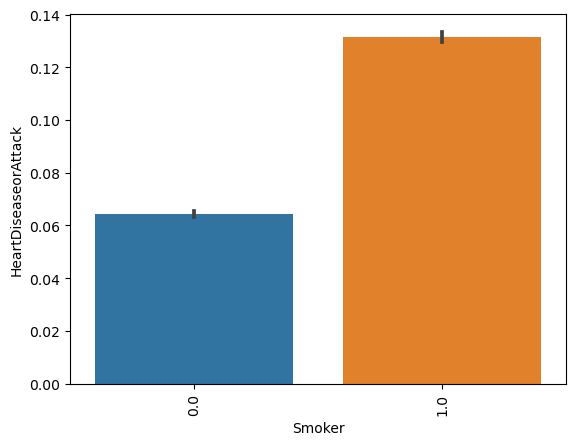

In [20]:

sns.barplot(x=data['Smoker'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()
     

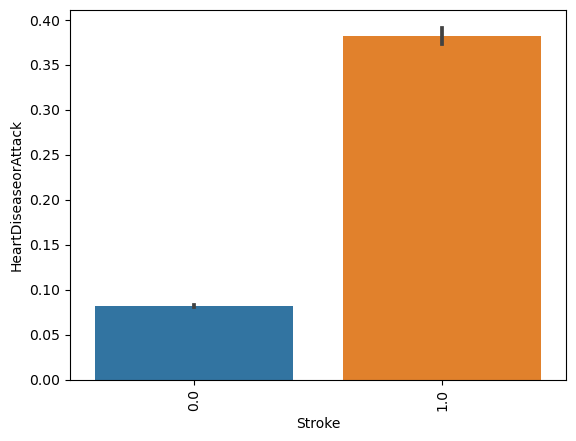

In [21]:
sns.barplot(x=data['Stroke'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

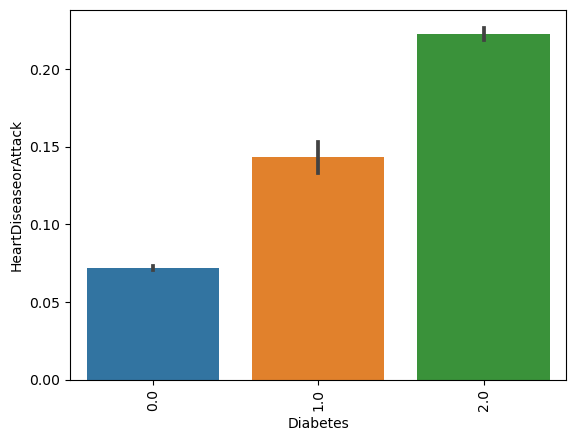

In [22]:
sns.barplot(x=data['Diabetes'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

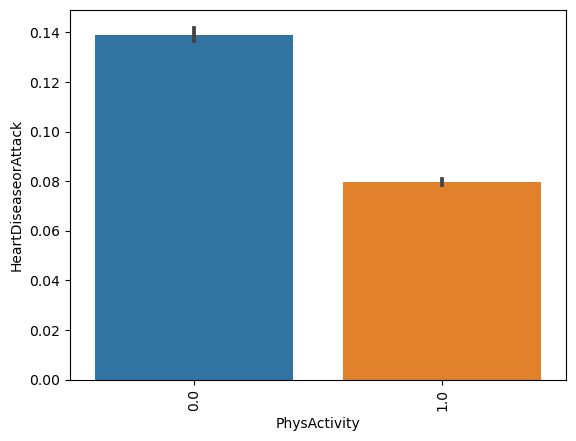

In [23]:

sns.barplot(x=data['PhysActivity'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

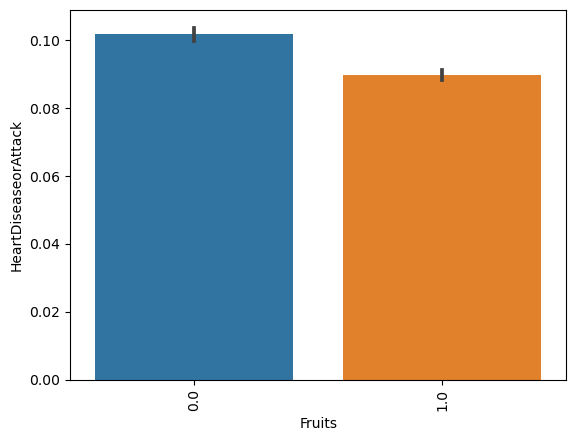

In [24]:
sns.barplot(x=data['Fruits'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

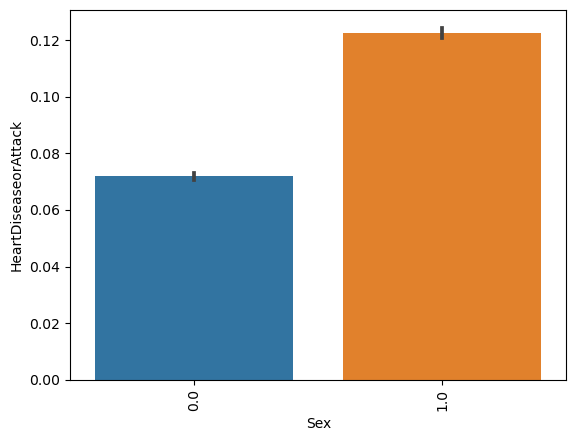

In [25]:

sns.barplot(x=data['Sex'],y=data['HeartDiseaseorAttack'])
plt.xticks(rotation=90)
plt.show()

## Train Test splitting

In [26]:

# split the dataset to the train and test set, prepare for training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (228312, 17)
y_train:  (228312,)
---
X_test:  (25368, 17)
y_test:  (25368,)


In [27]:

# Define the dictionary to store all results
results = {}
     

In [28]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Resampling Techniques 

In [29]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [30]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [31]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression with class weights
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
lr_model.fit(X_train, y_train)


C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with L2 regularization
logistic_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Train the model
logistic_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logistic_reg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.56      0.13      0.22      4768

    accuracy                           0.91     50736
   macro avg       0.74      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



## Models Evaluation

### Logistic Regression

In [36]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)

Logistic Regression Metrics:
Accuracy: 0.9061810154525386
Precision: 0.5166340508806262
Recall: 0.11013767209011265
F1 Score: 0.1815680880330124


C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [37]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)
print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)


Random Forest Metrics:
Accuracy: 0.8965231788079471
Precision: 0.3802521008403361
Recall: 0.1510221109720484
F1 Score: 0.21618393550313528


### Gradient Boosting Classifier

In [38]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1_score = f1_score(y_test, gb_predictions)
print("\nGradient Boosting Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1_score)


Gradient Boosting Metrics:
Accuracy: 0.9066934720908231
Precision: 0.5307377049180327
Recall: 0.10805173133083021
F1 Score: 0.17954939341421144


### SVM

In [39]:
# Initialize and train Support Vector Machines (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)
print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1_score)


SVM Metrics:
Accuracy: 0.9055108798486282
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Pavan\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Neural Networks

In [40]:
# Initialize and train Feedforward Neural Network (FNN) model
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, nn_predictions)
precision = precision_score(y_test, nn_predictions)
recall = recall_score(y_test, nn_predictions)
f1 = f1_score(y_test, nn_predictions)

print("Neural Network Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Neural Network Metrics:
Accuracy: 0.9068511510564491
Precision: 0.5442708333333334
Recall: 0.08719232373800584
F1 Score: 0.15030564545127653


In [41]:
import pandas as pd

# Assuming you have already calculated the evaluation metrics for each algorithm
# Replace the values below with the actual evaluation metrics
metrics_data = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network'],
    'Accuracy': [lr_accuracy, rf_accuracy, gb_accuracy, svm_accuracy, accuracy],
    'Precision': [lr_precision, rf_precision, gb_precision, svm_precision, precision],
    'Recall': [lr_recall, rf_recall, gb_recall, svm_recall, recall],
    'F1 Score': [lr_f1_score, rf_f1_score, gb_f1_score, svm_f1_score, f1]
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print(metrics_df)


             Algorithm  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.906181   0.516634  0.110138  0.181568
1        Random Forest  0.896523   0.380252  0.151022  0.216184
2    Gradient Boosting  0.906693   0.530738  0.108052  0.179549
3                  SVM  0.905511   0.000000  0.000000  0.000000
4       Neural Network  0.906851   0.544271  0.087192  0.150306


### Based on the above results and considering both performance and computational complexity, we can choose the Logistic Regression model

## Prediction on new unseen data

In [46]:

input_data = (1,0,1,28,1,0,0,0,0,1,0,2,0,0,1,1,11)
# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predictions using logistic regression
lr_prediction = lr_model.predict(input_data_reshaped)

# Print predictions
print("Result =", lr_prediction)

# Interpret predictions
if lr_prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('Logistic Regression: The person has heart disease.')


Result = [0.]
The person does not have heart disease.


In [47]:
import pickle

In [49]:
filename = "train_new_mod.sav"
pickle.dump(lr_model, open(filename, 'wb'))

In [50]:
loadedmodel = pickle.load(open('train_new_mod.sav', 'rb'))

In [51]:

input_data = (1,0,1,28,1,0,0,0,0,1,0,2,0,0,1,1,11)
# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predictions using logistic regression
lr_prediction = loadedmodel.predict(input_data_reshaped)

# Print predictions
print("Result =", lr_prediction)

# Interpret predictions
if lr_prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('Logistic Regression: The person has heart disease.')


Result = [0.]
The person does not have heart disease.
